In [1]:
#installing of the google-play-scraper
#!pip install app_store_scraper 

     |████████████████████████████████| 58 kB 314 kB/s eta 0:00:011
     |████████████████████████████████| 127 kB 679 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 1.5 MB/s eta 0:00:011
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [6]:
import pandas as pd
import numpy as np
import json
from datetime import datetime

datetime_str = '11/01/21 00:00:00'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')


from app_store_scraper import AppStore
scotiabank = AppStore(country='ca', app_name='scotiabank', app_id = '341151570')

scotiabank.review(how_many=2000, after=datetime_object)


2022-10-25 17:14:25,982 [INFO] Base - Initialised: AppStore('ca', 'scotiabank', 341151570)
2022-10-25 17:14:25,983 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ca/app/scotiabank/id341151570
2022-10-25 17:14:31,047 [INFO] Base - [id:341151570] Fetched 279 reviews (279 fetched in total)
2022-10-25 17:14:36,367 [INFO] Base - [id:341151570] Fetched 724 reviews (724 fetched in total)
2022-10-25 17:14:41,546 [INFO] Base - [id:341151570] Fetched 724 reviews (724 fetched in total)
2022-10-25 17:14:46,756 [INFO] Base - [id:341151570] Fetched 724 reviews (724 fetched in total)
2022-10-25 17:14:52,043 [INFO] Base - [id:341151570] Fetched 724 reviews (724 fetched in total)
2022-10-25 17:14:57,439 [INFO] Base - [id:341151570] Fetched 724 reviews (724 fetched in total)
2022-10-25 17:15:02,741 [INFO] Base - [id:341151570] Fetched 724 reviews (724 fetched in total)
2022-10-25 17:15:23,060 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=

In [7]:
# scotiabank.reviews

[{'rating': 5,
  'review': 'Imagine being so insecure that you leave a negative review because an icon? Giving a 5 star to counteract the homophobes. 🙂',
  'title': 'Imagine..',
  'isEdited': False,
  'userName': '29characterslong',
  'date': datetime.datetime(2022, 6, 15, 15, 15, 9)},
 {'rating': 1,
  'review': 'How do I change my icon back to the original.  I don’t want to play these forced social games during pride!',
  'title': 'Icon',
  'isEdited': False,
  'userName': 'marxsis',
  'date': datetime.datetime(2022, 6, 7, 22, 13, 40)},
 {'rating': 1,
  'review': '2SV is horrible doesn’t let you sign in and send the push motivation. Forces you to turn it back on every time you deactivate it.',
  'title': '2SV',
  'isEdited': False,
  'userName': 'MuiTNguyen613',
  'date': datetime.datetime(2022, 8, 21, 13, 56, 31)},
 {'rating': 1,
  'review': 'Remove political flag off app. I don’t want it on my phone. It has nothing to do with you managing my money. I will find another financial inst

In [9]:
df_reviews = pd.DataFrame(np.array(scotiabank.reviews),columns=['review'])


df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))



df_reviews.head()

,rating,review,title,isEdited,userName,date,developerResponse
0,5,Imagine being so insecure that you leave a neg...,Imagine..,False,29characterslong,2022-06-15 15:15:09,NaN
1,1,How do I change my icon back to the original. ...,Icon,False,marxsis,2022-06-07 22:13:40,NaN
2,1,2SV is horrible doesn’t let you sign in and se...,2SV,False,MuiTNguyen613,2022-08-21 13:56:31,NaN
3,1,Remove political flag off app. I don’t want it...,Ridiculous,False,Duane747,2022-07-02 15:33:30,NaN
4,1,I don’t care if you want to put them up on you...,Get rid of the rainbow,False,Jw52738394,2022-07-02 14:00:40,NaN


In [13]:
#df_reviews[['date','time']]=df_reviews['date'].astype(str).str.split(' ', expand=True)
df_reviews['date'] = pd.to_datetime(df_reviews['date'], format='%Y-%m-%d')
df_reviews['year'] = df_reviews['date'].dt.year
df_reviews['month'] = df_reviews['date'].dt.month
df_reviews['repliedbool']=df_reviews['developerResponse'].astype(str)!="NaT"


df_reviews['repliedbool'].describe()

count      724
unique       1
top       True
freq       724
Name: repliedbool, dtype: object

<AxesSubplot:xlabel='year,month'>

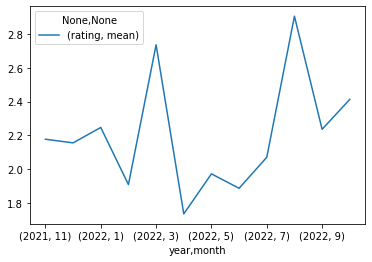

In [16]:
df_reviews.groupby(['year','month']).agg({'rating':['mean']}).plot.line()

In [19]:
df_reviews[df_reviews['date']>'2022-06-01']['rating'].describe()

count    325.000000
mean       2.252308
std        1.669729
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [30]:
df_reviews['rating'].mean()
df_reviews['review']=df_reviews['review'].str.lower()

In [101]:
df_reviews['2sv']=df_reviews['review'].str.contains('two|2sv|2fa|verif|step|factor|ident', regex=True)
df_reviews['login']=df_reviews['review'].str.contains('login|log|sign', regex=True)
df_reviews['crash']=df_reviews['review'].str.contains('crash|rebo|download', regex=True)
df_reviews['update']=df_reviews['review'].str.contains('update', regex=True)
df_reviews['deposit']=df_reviews['review'].str.contains('deposit|cheq', regex=True)
df_reviews['pride']=df_reviews['review'].str.contains('pride|icon|logo|flag|unicorn|homophob|disrespect|banner', regex=True)

df_reviews['2sv_login']=df_reviews['review'].str.contains('two|2sv|2fa|verif|step|factor|ident|login|log|sign', regex=True)

In [60]:
datetime_str = '01/01/22 00:00:00'


<AxesSubplot:xlabel='month'>

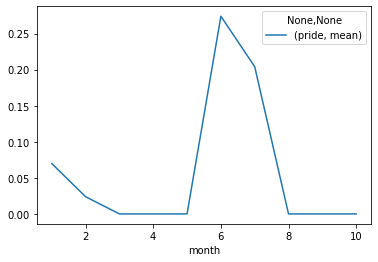

In [104]:
df_reviews[(df_reviews['rating']<3) & (df_reviews['year']==2022)].groupby(['month']).agg({'pride':['mean']}).plot.line()





In [80]:
print(two_sv_login.columns)
print(two_sv_login.head())
two_sv_login.columns.levels

MultiIndex([('2sv_login', 'count')],
           )
      2sv_login
          count
month          
1            43
2            42
3            22
4            49
5            50


FrozenList([['2sv_login'], ['count']])

MultiIndex([('2sv_login', 'count')],
           )

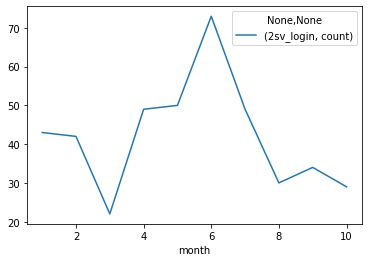

In [86]:
two_sv_login.reset_index(level=['month'])
two_sv_login.plot.line()
two_sv_login.columns

In [87]:
import matplotlib.pyplot as plt
import os

# two_sv_login.plot(kind='line',x='month',y='count')
# #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
# plt.show()

In [106]:
from textblob import TextBlob, Word
from keybert import KeyBERT

text=' '.join(df_reviews[df_reviews['date']>'2022-07-01']['review']).replace('won\'t','wont')
sentence = text

s = TextBlob(sentence)
doc = " ".join([w.lemmatize() for w in s.words])

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)


print(kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None,top_n=50))

2022-10-27 13:49:52,775 [INFO] sentence_transformers.SentenceTransformer - Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-10-27 13:49:53,030 [INFO] sentence_transformers.SentenceTransformer - Use pytorch device: cpu


[('deactivating', 0.3705), ('app', 0.3705), ('account', 0.3677), ('authentication', 0.3631), ('scotiabank', 0.3555), ('apps', 0.3531), ('deactivate', 0.3509), ('login', 0.3496), ('registration', 0.3425), ('logins', 0.3398), ('scotiaapp', 0.3346), ('activate', 0.3257), ('scotiabanking', 0.3185), ('verification', 0.3183), ('mobile', 0.3048), ('securely', 0.2843), ('activation', 0.2841), ('ipad', 0.2835), ('reactivate', 0.2809), ('reseting', 0.2807), ('secure', 0.2786), ('activating', 0.2779), ('2sv', 0.2772), ('registered', 0.2762), ('bank', 0.2743), ('stay', 0.2736), ('banking', 0.2735), ('provider', 0.2735), ('wallet', 0.2729), ('reinstate', 0.2728), ('iphone', 0.2725), ('fraud', 0.2676), ('identity', 0.2674), ('trust', 0.267), ('password', 0.266), ('logged', 0.2642), ('change', 0.2588), ('verifying', 0.2586), ('2fa', 0.2528), ('disconnect', 0.2528), ('reinstalled', 0.2515), ('accessing', 0.2511), ('unable', 0.2486), ('reinstalling', 0.2475), ('itrade', 0.2463), ('accpted', 0.246), ('r

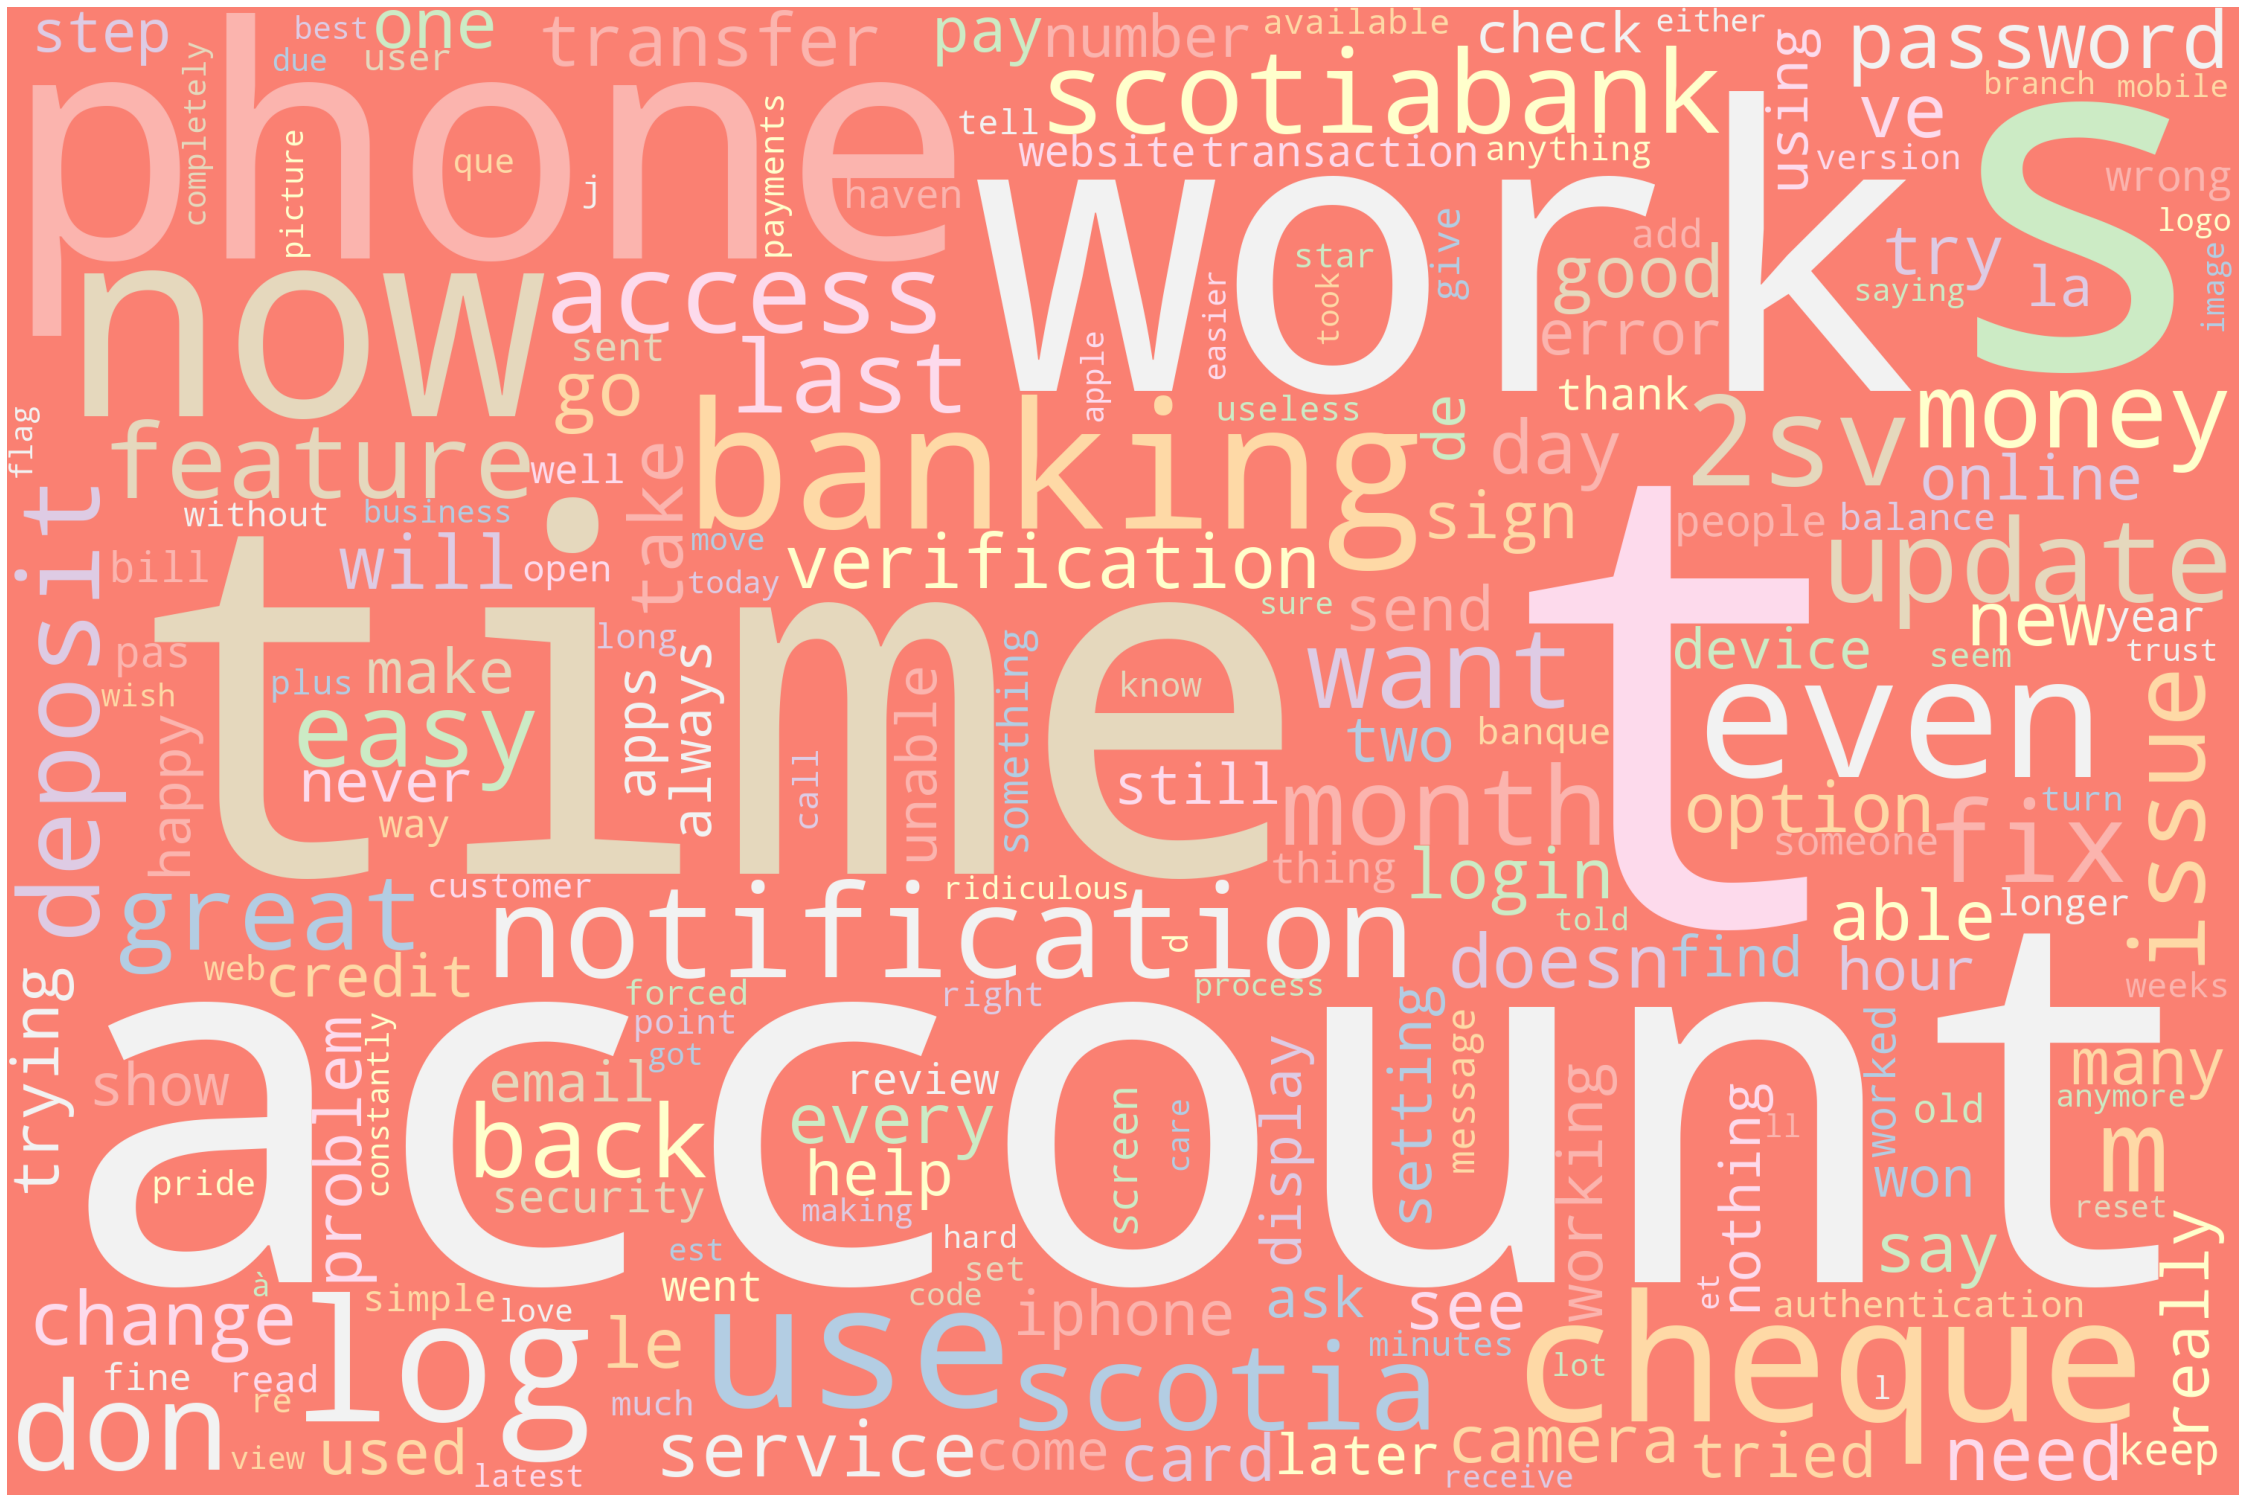

In [107]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Import package
from wordcloud import WordCloud, STOPWORDS

product_stopwords = {"app","please","bank"}#{"products","scotiabank","skill","skills","will","day","is","this","role","right","for","product","you","experience", "minimum", "digital","scotia"}


# text = df_jan['content'].astype(str).values 

STOPWORDS=STOPWORDS.union(product_stopwords)

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [100]:
print(text)

imagine being so insecure that you leave a negative review because an icon? giving a 5 star to counteract the homophobes. 🙂 how do i change my icon back to the original.  i don’t want to play these forced social games during pride! 2sv is horrible doesn’t let you sign in and send the push motivation. forces you to turn it back on every time you deactivate it. remove political flag off app. i don’t want it on my phone. it has nothing to do with you managing my money. i will find another financial institution who stays in their lane. i don’t care if you want to put them up on your logo from the store or emails or website or whatever. but putting a rainbow on my bloody home screen is way too far

edit: pride month is over, change it back or i’m changing banks ok scotiabank its july 1st you can lose the pride logo’s now. in fact you can go ahead an make it an option to even have it on in the first place. not everyone wants to see rainbows all over their phones. stop pretending to be a soci